- 1stFlrSF:	 First Floor square feet
- 2ndFlrSF:	 Second floor square feet
- 3SsnPorch:	 Three season porch area in square feet
- Alley:	 Type of alley access
- Bedroom:	 Number of bedrooms above basement level
- BldgType:	 Type of dwelling
- BsmtCond:	 General condition of the basement
- BsmtExposure:	 Walkout or garden level basement walls
- BsmtFinSF1:	 Type 1 finished square feet
- BsmtFinSF2:	 Type 2 finished square feet
- BsmtFinType1:	 Quality of basement finished area
- BsmtFinType2:	 Quality of second finished area (if present)
- BsmtFullBath:	 Basement full bathrooms
- BsmtHalfBath:	 Basement half bathrooms
- BsmtQual:	 Height of the basement
- BsmtUnfSF:	 Unfinished square feet of basement area
- CentralAir:	 Central air conditioning
- Condition1:	 Proximity to main road or railroad
- Condition2:	 Proximity to main road or railroad (if a second is present)
- Electrical:	 Electrical system
- EnclosedPorch:	 Enclosed porch area in square feet
- ExterCond:	 Present condition of the material on the exterior
- Exterior1st:	 Exterior covering on house
- Exterior2nd:	 Exterior covering on house (if more than one material)
- ExterQual:	 Exterior material quality
- Fence:	 Fence quality
- FireplaceQu:	 Fireplace quality
- Fireplaces:	 Number of fireplaces
- Foundation:	 Type of foundation
- FullBath:	 Full bathrooms above grade
- Functional:	 Home functionality rating
- GarageArea:	 Size of garage in square feet
- GarageCars:	 Size of garage in car capacity
- GarageCond:	 Garage condition
- GarageFinish:	 Interior finish of the garage
- GarageQual:	 Garage quality
- GarageType:	 Garage location
- GarageYrBlt:	 Year garage was built
- GrLivArea:	 Above grade (ground) living area square feet
- HalfBath:	 Half baths above grade
- - Heating:	 Type of heating
- HeatingQC:	 Heating quality and condition
- HouseStyle:	 Style of dwelling
- Id:	Observation Id
- Kitchen:	 Number of kitchens
- KitchenQual:	 Kitchen quality
- LandContour:	 Flatness of the property
- LandSlope:	 Slope of property
- LotArea:	 Lot size in square feet
- LotConfig:	 Lot configuration
- LotFrontage:	 Linear feet of street connected to property
- LotShape:	 General shape of property
- LowQualFinSF:	 Low quality finished square feet (all floors)
- MasVnrArea:	 Masonry veneer area in square feet
- MasVnrType:	 Masonry veneer type
- MiscFeature:	 Miscellaneous feature not covered in other categories
- MiscVal:	 $Value of miscellaneous feature
- MoSold:	 Month Sold
- MSSubClass:	 The building class
- MSZoning:	 The general zoning classification
- Neighborhood:	 Physical locations within Ames city limits
- OpenPorchSF:	 Open porch area in square feet
- OverallCond:	 Overall condition rating
- OverallQual:	 Overall material and finish quality
- PavedDrive:	 Paved driveway
- PoolArea:	 Pool area in square feet
- PoolQC:	 Pool quality
- RoofMatl:	 Roof material
- RoofStyle:	 Type of roof
- SaleCondition:	 Condition of sale
- SalePrice:	 the property's sale price in dollars. This is the target variable that you're trying to predict.
- SaleType:	 Type of sale
- ScreenPorch:	 Screen porch area in square feet
- Street:	 Type of road access
- TotalBsmtSF:	 Total square feet of basement area
- TotRmsAbvGrd:	 Total rooms above grade (does not include bathrooms)
- Utilities:	 Type of utilities available
- WoodDeckSF:	 Wood deck area in square feet
- YearBuilt:	 Original construction date
- YearRemodAdd:	 Remodel date
- YrSold:	 Year Sold


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy import stats
from scipy.stats import norm

from sklearn.preprocessing import StandardScaler
from sklearn import ensemble, tree, linear_model
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, cross_val_score



import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('train.csv')

In [3]:
from IPython.display import display
pd.options.display.max_columns=None
df=df.reindex_axis(sorted(df.columns),axis=1)
df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706,0,GLQ,Unf,1,0,Gd,150,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,548,2,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,Ex,2Story,1,1,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,NaN,0,2,CollgCr,61,5,7,Y,0,NaN,CompShg,Gable,Normal,208500,WD,0,Pave,8,856,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978,0,ALQ,Unf,0,1,Gd,284,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,NaN,TA,1,CBlock,2,Typ,460,2,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,Ex,1Story,2,1,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,NaN,0,5,Veenker,0,8,6,Y,0,NaN,CompShg,Gable,Normal,181500,WD,0,Pave,6,1262,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486,0,GLQ,Unf,1,0,Gd,434,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,608,2,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,Ex,2Story,3,1,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,NaN,0,9,CollgCr,42,5,7,Y,0,NaN,CompShg,Gable,Normal,223500,WD,0,Pave,6,920,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216,0,ALQ,Unf,1,0,TA,540,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,NaN,Gd,1,BrkTil,1,Typ,642,3,TA,Unf,TA,Detchd,1998.0,1717,0,GasA,Gd,2Story,4,1,Gd,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,NaN,0,2,Crawfor,35,5,7,Y,0,NaN,CompShg,Gable,Abnorml,140000,WD,0,Pave,7,756,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655,0,GLQ,Unf,1,0,Gd,490,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,836,3,TA,RFn,TA,Attchd,2000.0,2198,1,GasA,Ex,2Story,5,1,Gd,Lvl,Gtl,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,NaN,0,12,NoRidge,84,5,8,Y,0,NaN,CompShg,Gable,Normal,250000,WD,0,Pave,9,1145,AllPub,192,2000,2000,2008


In [4]:
df.shape

(1460, 81)

### Remove "Id" from dataset

In [5]:
df=df.drop(columns=['Id'])

In [6]:
df.shape

(1460, 80)

In [7]:
df.dtypes

1stFlrSF           int64
2ndFlrSF           int64
3SsnPorch          int64
Alley             object
BedroomAbvGr       int64
BldgType          object
BsmtCond          object
BsmtExposure      object
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtFinType1      object
BsmtFinType2      object
BsmtFullBath       int64
BsmtHalfBath       int64
BsmtQual          object
BsmtUnfSF          int64
CentralAir        object
Condition1        object
Condition2        object
Electrical        object
EnclosedPorch      int64
ExterCond         object
ExterQual         object
Exterior1st       object
Exterior2nd       object
Fence             object
FireplaceQu       object
Fireplaces         int64
Foundation        object
FullBath           int64
                  ...   
LotShape          object
LowQualFinSF       int64
MSSubClass         int64
MSZoning          object
MasVnrArea       float64
MasVnrType        object
MiscFeature       object
MiscVal            int64
MoSold             int64


## Data Cleaning

### Checking NAs

In [8]:
null_cols=df.columns[df.isnull().any()]
df[null_cols].isnull().sum().sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageQual        81
GarageFinish      81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtFinType1      37
BsmtCond          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [9]:
dg=(df[null_cols].isnull().sum()/len(df)*100).sort_values(ascending=False)
dg

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtFinType1     2.534247
BsmtCond         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [10]:
featureName=dg.index.values
featureName

array(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
       'LotFrontage', 'GarageYrBlt', 'GarageType', 'GarageQual',
       'GarageFinish', 'GarageCond', 'BsmtFinType2', 'BsmtExposure',
       'BsmtQual', 'BsmtFinType1', 'BsmtCond', 'MasVnrArea', 'MasVnrType',
       'Electrical'], dtype=object)

In [11]:
def missingness(featureName):
    for i in featureName:
        print(i)
        print(df[i].value_counts(dropna=False))
        print("Value missing: %2.1f %%" % (df[i].isnull().sum()/len(df)*100))
        print()

### Checking unique values of feature with more than 70% missning values

In [12]:
missingness(featureName)

PoolQC
NaN    1453
Gd        3
Fa        2
Ex        2
Name: PoolQC, dtype: int64
Value missing: 99.5 %

MiscFeature
NaN     1406
Shed      49
Othr       2
Gar2       2
TenC       1
Name: MiscFeature, dtype: int64
Value missing: 96.3 %

Alley
NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64
Value missing: 93.8 %

Fence
NaN      1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64
Value missing: 80.8 %

FireplaceQu
NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64
Value missing: 47.3 %

LotFrontage
NaN       259
 60.0     143
 70.0      70
 80.0      69
 50.0      57
 75.0      53
 65.0      44
 85.0      40
 78.0      25
 21.0      23
 90.0      23
 68.0      19
 24.0      19
 64.0      19
 73.0      18
 72.0      17
 79.0      17
 63.0      17
 55.0      17
 100.0     16
 51.0      15
 66.0      15
 74.0      15
 52.0      14
 59.0      13
 71.0      12
 67.0      12
 57.0      12
 82.0  

### Remove columns with more than 70% of missing values

In [13]:
df=df.drop(columns=['PoolQC','MiscFeature','Alley','Fence'])

In [14]:
df.shape

(1460, 76)

### Checking the rest of features with missing values

In [15]:
null_cols=df.columns[df.isnull().any()]
dg=(df[null_cols].isnull().sum()/len(df)*100).sort_values(ascending=False)
print(dg)
nullCol=dg.index.values
nullCol

FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtFinType1     2.534247
BsmtCond         2.534247
MasVnrType       0.547945
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64


array(['FireplaceQu', 'LotFrontage', 'GarageYrBlt', 'GarageType',
       'GarageQual', 'GarageFinish', 'GarageCond', 'BsmtFinType2',
       'BsmtExposure', 'BsmtQual', 'BsmtFinType1', 'BsmtCond',
       'MasVnrType', 'MasVnrArea', 'Electrical'], dtype=object)

### It looks like "FireplaceQu" has "NaN" value when "Fireplaces" has "zero" value. 
### Let's check if the number of missing value in "FireplaceQu" is the same as the number of rows with zero value in "Fireplaces"

In [16]:
df['FireplaceQu'].isnull().sum()

690

In [17]:
len(df.loc[df['Fireplaces']==0])

690

### It turns out the number is the same. 
### We can go ahead and replace the "NaN" in "FireplaceQu" with "0"

### Also, we will change the datatype of "FireplaceQu" to a "Ordinal" Variable

### First we will need to replace "NaN" with "0" value

In [18]:
df['FireplaceQu'].fillna(0,inplace=True)

In [19]:
df['FireplaceQu'].value_counts()

0     690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

### Replace string values to ordinal value in "FireplaceQu"

In [20]:
#quality={'Po':1,'Fa':2,'TA':3,'Gd':4,"Ex":5}
df.FireplaceQu[df.FireplaceQu=='Po']=1
df.FireplaceQu[df.FireplaceQu=='Fa']=2
df.FireplaceQu[df.FireplaceQu=='TA']=3
df.FireplaceQu[df.FireplaceQu=='Gd']=4
df.FireplaceQu[df.FireplaceQu=='Ex']=5

In [21]:
df.FireplaceQu.dtypes

dtype('O')

### Let's change the datatype of "FireplaceQu" to "int"

In [22]:
df=df.astype({"FireplaceQu":int})

In [23]:
df.FireplaceQu.dtypes

dtype('int32')

In [24]:
df['LotFrontage'].isnull().sum()

259

### Some Lot just does not have LotFronage.
### Change "NaN" value to "zero" in "LotFrontage"

In [25]:
df['LotFrontage'].fillna(0,inplace=True)

### Check if the number of "0" value is the same as the number "NaN" value

In [26]:
df['LotFrontage'].value_counts()

0.0      259
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
24.0      19
64.0      19
73.0      18
72.0      17
79.0      17
63.0      17
55.0      17
100.0     16
51.0      15
66.0      15
74.0      15
52.0      14
59.0      13
71.0      12
67.0      12
57.0      12
82.0      12
43.0      12
        ... 
129.0      2
313.0      2
118.0      2
122.0      2
121.0      2
101.0      2
109.0      2
115.0      2
116.0      2
114.0      2
153.0      1
149.0      1
150.0      1
111.0      1
182.0      1
46.0       1
112.0      1
141.0      1
33.0       1
152.0      1
160.0      1
168.0      1
128.0      1
144.0      1
39.0       1
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 111, dtype: int64

### Double check all the missing values again 

In [27]:
null_cols=df.columns[df.isnull().any()]
df[null_cols].isnull().sum().sort_values(ascending=False)
dg=(df[null_cols].isnull().sum()/len(df)*100).sort_values(ascending=False)
dg

GarageYrBlt     5.547945
GarageType      5.547945
GarageQual      5.547945
GarageFinish    5.547945
GarageCond      5.547945
BsmtFinType2    2.602740
BsmtExposure    2.602740
BsmtQual        2.534247
BsmtFinType1    2.534247
BsmtCond        2.534247
MasVnrType      0.547945
MasVnrArea      0.547945
Electrical      0.068493
dtype: float64

### All the remaining variables have less than 6% of missing values.
### We will remove all the rows with any missing values.

In [28]:
df_miss=df.dropna()

In [29]:
df_miss.isnull().sum()

1stFlrSF         0
2ndFlrSF         0
3SsnPorch        0
BedroomAbvGr     0
BldgType         0
BsmtCond         0
BsmtExposure     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtFinType1     0
BsmtFinType2     0
BsmtFullBath     0
BsmtHalfBath     0
BsmtQual         0
BsmtUnfSF        0
CentralAir       0
Condition1       0
Condition2       0
Electrical       0
EnclosedPorch    0
ExterCond        0
ExterQual        0
Exterior1st      0
Exterior2nd      0
FireplaceQu      0
Fireplaces       0
Foundation       0
FullBath         0
Functional       0
GarageArea       0
                ..
LotConfig        0
LotFrontage      0
LotShape         0
LowQualFinSF     0
MSSubClass       0
MSZoning         0
MasVnrArea       0
MasVnrType       0
MiscVal          0
MoSold           0
Neighborhood     0
OpenPorchSF      0
OverallCond      0
OverallQual      0
PavedDrive       0
PoolArea         0
RoofMatl         0
RoofStyle        0
SaleCondition    0
SalePrice        0
SaleType         0
ScreenPorch 

In [30]:
df_miss.shape

(1338, 76)

In [31]:
len(df)-len(df_miss)

122

### Checking the percentage of data removed

In [32]:
(len(df)-len(df_miss))/len(df)*100

8.356164383561644

## Start working on Outliers

### Explore z-score for "SalePrice" variable

In [33]:
df_miss['z']=np.abs(stats.zscore(df_miss['SalePrice']))
len(df_miss['z'])

1338

In [34]:
df_miss['z'].dtype

dtype('float64')

### Setup "Threshold"

In [35]:
threshold=3

### Checking the percentage of outliers

In [36]:
len(df_miss[df_miss['z']>threshold])/len(df_miss)*100

1.4947683109118086

In [37]:
df_out=df_miss.drop(df_miss[df_miss.z>threshold].index)
df_out.shape

(1318, 77)

### Percentage data will be used for the feature engineering step

In [38]:
len(df_out)/len(df)*100

90.27397260273973

### Remove column "z" from dataframe

In [39]:
df_out=df_out.drop(columns=['z'])

In [40]:
df_out.shape

(1318, 76)

## Convert all 'object' datatype variables to 'numerical" variables.

### First we need to convert "object" datatype to "categorical" datatype.

In [41]:
df_out.select_dtypes(include=['object']).head()

,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,Electrical,ExterCond,ExterQual,Exterior1st,Exterior2nd,Foundation,Functional,GarageCond,GarageFinish,GarageQual,GarageType,Heating,HeatingQC,HouseStyle,KitchenQual,LandContour,LandSlope,LotConfig,LotShape,MSZoning,MasVnrType,Neighborhood,PavedDrive,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities
0,1Fam,TA,No,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,PConc,Typ,TA,RFn,TA,Attchd,GasA,Ex,2Story,Gd,Lvl,Gtl,Inside,Reg,RL,BrkFace,CollgCr,Y,CompShg,Gable,Normal,WD,Pave,AllPub
1,1Fam,TA,Gd,ALQ,Unf,Gd,Y,Feedr,Norm,SBrkr,TA,TA,MetalSd,MetalSd,CBlock,Typ,TA,RFn,TA,Attchd,GasA,Ex,1Story,TA,Lvl,Gtl,FR2,Reg,RL,None,Veenker,Y,CompShg,Gable,Normal,WD,Pave,AllPub
2,1Fam,TA,Mn,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,PConc,Typ,TA,RFn,TA,Attchd,GasA,Ex,2Story,Gd,Lvl,Gtl,Inside,IR1,RL,BrkFace,CollgCr,Y,CompShg,Gable,Normal,WD,Pave,AllPub
3,1Fam,Gd,No,ALQ,Unf,TA,Y,Norm,Norm,SBrkr,TA,TA,Wd Sdng,Wd Shng,BrkTil,Typ,TA,Unf,TA,Detchd,GasA,Gd,2Story,Gd,Lvl,Gtl,Corner,IR1,RL,None,Crawfor,Y,CompShg,Gable,Abnorml,WD,Pave,AllPub
4,1Fam,TA,Av,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,PConc,Typ,TA,RFn,TA,Attchd,GasA,Ex,2Story,Gd,Lvl,Gtl,FR2,IR1,RL,BrkFace,NoRidge,Y,CompShg,Gable,Normal,WD,Pave,AllPub


In [42]:
df_out_object_col=list(df_out.select_dtypes(include=['object']).columns.values)
df_out_object_col

['BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Foundation',
 'Functional',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotConfig',
 'LotShape',
 'MSZoning',
 'MasVnrType',
 'Neighborhood',
 'PavedDrive',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SaleType',
 'Street',
 'Utilities']

In [43]:
df_out[df_out_object_col].head()

,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,Electrical,ExterCond,ExterQual,Exterior1st,Exterior2nd,Foundation,Functional,GarageCond,GarageFinish,GarageQual,GarageType,Heating,HeatingQC,HouseStyle,KitchenQual,LandContour,LandSlope,LotConfig,LotShape,MSZoning,MasVnrType,Neighborhood,PavedDrive,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities
0,1Fam,TA,No,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,PConc,Typ,TA,RFn,TA,Attchd,GasA,Ex,2Story,Gd,Lvl,Gtl,Inside,Reg,RL,BrkFace,CollgCr,Y,CompShg,Gable,Normal,WD,Pave,AllPub
1,1Fam,TA,Gd,ALQ,Unf,Gd,Y,Feedr,Norm,SBrkr,TA,TA,MetalSd,MetalSd,CBlock,Typ,TA,RFn,TA,Attchd,GasA,Ex,1Story,TA,Lvl,Gtl,FR2,Reg,RL,None,Veenker,Y,CompShg,Gable,Normal,WD,Pave,AllPub
2,1Fam,TA,Mn,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,PConc,Typ,TA,RFn,TA,Attchd,GasA,Ex,2Story,Gd,Lvl,Gtl,Inside,IR1,RL,BrkFace,CollgCr,Y,CompShg,Gable,Normal,WD,Pave,AllPub
3,1Fam,Gd,No,ALQ,Unf,TA,Y,Norm,Norm,SBrkr,TA,TA,Wd Sdng,Wd Shng,BrkTil,Typ,TA,Unf,TA,Detchd,GasA,Gd,2Story,Gd,Lvl,Gtl,Corner,IR1,RL,None,Crawfor,Y,CompShg,Gable,Abnorml,WD,Pave,AllPub
4,1Fam,TA,Av,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,PConc,Typ,TA,RFn,TA,Attchd,GasA,Ex,2Story,Gd,Lvl,Gtl,FR2,IR1,RL,BrkFace,NoRidge,Y,CompShg,Gable,Normal,WD,Pave,AllPub


In [44]:
df_out[df_out_object_col]=df_out[df_out_object_col].astype('category',copy=True)

In [45]:
df_out['BldgType'].dtypes

CategoricalDtype(categories=['1Fam', '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE'], ordered=False)

In [46]:
for item in df_out_object_col:
    print(df_out[item].dtypes)

category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category


### Then we need to convert "Category" variable to "Numerical" values with "Label Encoding" technique.

In [47]:
for item in df_out_object_col:
    df_out[item]=df_out[item].cat.codes

In [48]:
df_out[df_out_object_col].head()

,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,Electrical,ExterCond,ExterQual,Exterior1st,Exterior2nd,Foundation,Functional,GarageCond,GarageFinish,GarageQual,GarageType,Heating,HeatingQC,HouseStyle,KitchenQual,LandContour,LandSlope,LotConfig,LotShape,MSZoning,MasVnrType,Neighborhood,PavedDrive,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities
0,0,3,3,2,5,2,1,2,2,4,3,2,11,13,2,6,4,1,4,1,0,0,5,2,3,0,4,3,3,1,5,2,1,1,4,8,1,0
1,0,3,1,0,5,2,1,1,2,4,3,3,7,8,1,6,4,1,4,1,0,0,2,3,3,0,2,3,3,2,24,2,1,1,4,8,1,0
2,0,3,2,2,5,2,1,2,2,4,3,2,11,13,2,6,4,1,4,1,0,0,5,2,3,0,4,0,3,1,5,2,1,1,4,8,1,0
3,0,1,3,0,5,3,1,2,2,4,3,3,12,15,0,6,4,2,4,5,0,2,5,2,3,0,0,0,3,2,6,2,1,1,0,8,1,0
4,0,3,0,2,5,2,1,2,2,4,3,2,11,13,2,6,4,1,4,1,0,0,5,2,3,0,2,0,3,1,15,2,1,1,4,8,1,0


## Feature Selection

### 1. Filter Method - Correlation Coefficient

In [49]:
corr=df_out.corr()
corr.sort_values(["SalePrice"],ascending=False,inplace=True)
dc=corr.SalePrice

In [50]:
dc

SalePrice        1.000000
OverallQual      0.787558
GrLivArea        0.669168
GarageCars       0.645356
GarageArea       0.605845
1stFlrSF         0.574687
TotalBsmtSF      0.565156
FullBath         0.556483
YearBuilt        0.540736
YearRemodAdd     0.533880
FireplaceQu      0.511371
GarageYrBlt      0.502445
TotRmsAbvGrd     0.500812
Foundation       0.472338
Fireplaces       0.441213
MasVnrArea       0.401726
OpenPorchSF      0.334349
BsmtFinSF1       0.316212
WoodDeckSF       0.314208
2ndFlrSF         0.268134
HalfBath         0.251482
LotArea          0.245630
Electrical       0.230448
CentralAir       0.221095
SaleCondition    0.217193
BsmtFullBath     0.216414
PavedDrive       0.191644
BsmtUnfSF        0.188832
LotFrontage      0.187709
Neighborhood     0.186784
                   ...   
BsmtCond         0.052078
Street           0.045431
PoolArea         0.032981
Condition2       0.005001
MasVnrType       0.004972
LandContour     -0.001613
MiscVal         -0.013775
YrSold      

In [51]:
dc.index

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       '1stFlrSF', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'YearRemodAdd',
       'FireplaceQu', 'GarageYrBlt', 'TotRmsAbvGrd', 'Foundation',
       'Fireplaces', 'MasVnrArea', 'OpenPorchSF', 'BsmtFinSF1', 'WoodDeckSF',
       '2ndFlrSF', 'HalfBath', 'LotArea', 'Electrical', 'CentralAir',
       'SaleCondition', 'BsmtFullBath', 'PavedDrive', 'BsmtUnfSF',
       'LotFrontage', 'Neighborhood', 'RoofStyle', 'GarageCond',
       'BedroomAbvGr', 'HouseStyle', 'GarageQual', 'Exterior2nd',
       'Exterior1st', 'Functional', 'ExterCond', 'Condition1', 'RoofMatl',
       'LandSlope', 'MoSold', 'ScreenPorch', 'BsmtFinType2', '3SsnPorch',
       'BsmtCond', 'Street', 'PoolArea', 'Condition2', 'MasVnrType',
       'LandContour', 'MiscVal', 'YrSold', 'Utilities', 'SaleType',
       'BsmtFinSF2', 'BsmtHalfBath', 'BsmtFinType1', 'Heating', 'LowQualFinSF',
       'LotConfig', 'BldgType', 'MSSubClass', 'OverallCond', 'KitchenA

In [52]:
dc.values

array([ 1.        ,  0.7875578 ,  0.6691678 ,  0.64535555,  0.60584492,
        0.57468693,  0.56515591,  0.55648257,  0.54073618,  0.53387957,
        0.51137121,  0.50244467,  0.500812  ,  0.47233792,  0.44121252,
        0.40172606,  0.33434857,  0.31621243,  0.31420821,  0.26813404,
        0.25148237,  0.24562999,  0.23044814,  0.22109505,  0.21719329,
        0.21641383,  0.19164376,  0.1888324 ,  0.18770874,  0.186784  ,
        0.17331522,  0.16152983,  0.16014423,  0.15388281,  0.15012766,
        0.1297516 ,  0.11952962,  0.1173793 ,  0.10852979,  0.10149667,
        0.09078799,  0.07663649,  0.07537071,  0.07342898,  0.06188179,
        0.0592067 ,  0.05207832,  0.04543149,  0.03298128,  0.0050012 ,
        0.00497207, -0.00161256, -0.01377451, -0.01713518, -0.01823609,
       -0.02325979, -0.02834359, -0.043828  , -0.04708824, -0.05163829,
       -0.05458422, -0.05785799, -0.06740395, -0.08225995, -0.10596948,
       -0.11953372, -0.14123985, -0.19745364, -0.25445313, -0.27

In [53]:
dc.index.values

array(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars',
       'GarageArea', '1stFlrSF', 'TotalBsmtSF', 'FullBath', 'YearBuilt',
       'YearRemodAdd', 'FireplaceQu', 'GarageYrBlt', 'TotRmsAbvGrd',
       'Foundation', 'Fireplaces', 'MasVnrArea', 'OpenPorchSF',
       'BsmtFinSF1', 'WoodDeckSF', '2ndFlrSF', 'HalfBath', 'LotArea',
       'Electrical', 'CentralAir', 'SaleCondition', 'BsmtFullBath',
       'PavedDrive', 'BsmtUnfSF', 'LotFrontage', 'Neighborhood',
       'RoofStyle', 'GarageCond', 'BedroomAbvGr', 'HouseStyle',
       'GarageQual', 'Exterior2nd', 'Exterior1st', 'Functional',
       'ExterCond', 'Condition1', 'RoofMatl', 'LandSlope', 'MoSold',
       'ScreenPorch', 'BsmtFinType2', '3SsnPorch', 'BsmtCond', 'Street',
       'PoolArea', 'Condition2', 'MasVnrType', 'LandContour', 'MiscVal',
       'YrSold', 'Utilities', 'SaleType', 'BsmtFinSF2', 'BsmtHalfBath',
       'BsmtFinType1', 'Heating', 'LowQualFinSF', 'LotConfig', 'BldgType',
       'MSSubClass', 'OverallCond', 'K

In [54]:
dc_new=dc[(dc.values>0.5)&(dc.values<1)]
dc_new

OverallQual     0.787558
GrLivArea       0.669168
GarageCars      0.645356
GarageArea      0.605845
1stFlrSF        0.574687
TotalBsmtSF     0.565156
FullBath        0.556483
YearBuilt       0.540736
YearRemodAdd    0.533880
FireplaceQu     0.511371
GarageYrBlt     0.502445
TotRmsAbvGrd    0.500812
Name: SalePrice, dtype: float64

In [55]:
feature_col=dc_new.index.values
feature_col

array(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', '1stFlrSF',
       'TotalBsmtSF', 'FullBath', 'YearBuilt', 'YearRemodAdd',
       'FireplaceQu', 'GarageYrBlt', 'TotRmsAbvGrd'], dtype=object)

## Log Transformation of "SalePrice'

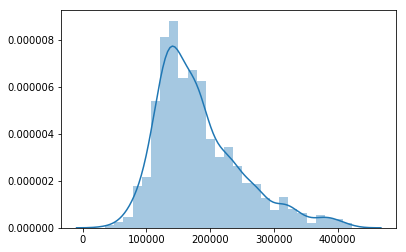

In [56]:
y=df_out[['SalePrice']]
sns.distplot(y)

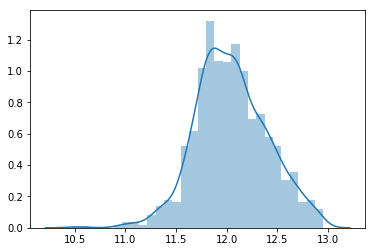

In [57]:
sns.distplot(np.log(y))

### Select the features to be used in the data analysis

In [58]:
X=df_out[feature_col]
y=np.log(df_out[['SalePrice']])

In [59]:
X.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,1stFlrSF,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,FireplaceQu,GarageYrBlt,TotRmsAbvGrd
0,7,1710,2,548,856,856,2,2003,2003,0,2003.0,8
1,6,1262,2,460,1262,1262,2,1976,1976,3,1976.0,6
2,7,1786,2,608,920,920,2,2001,2002,3,2001.0,6
3,7,1717,3,642,961,756,1,1915,1970,4,1998.0,7
4,8,2198,3,836,1145,1145,2,2000,2000,3,2000.0,9


In [60]:
y.head()

,SalePrice
0,12.247694
1,12.109011
2,12.317167
3,11.849398
4,12.429216


## Modeling

### Split the data to train and test dataset

In [61]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=200)

### Ridge Regression

In [62]:
from sklearn.linear_model import Ridge
RR=Ridge(alpha=10,fit_intercept=False)
RR_fit=RR.fit(x_train,y_train)
y_pred=RR_fit.predict(x_train)
np.sqrt(mean_squared_error(y_pred,y_train))

0.1494721671439278

In [63]:
y_pred=RR_fit.predict(x_test)
np.sqrt(mean_squared_error(y_pred,y_test))

0.2652481245848191

### Lasso Regression

In [64]:
from sklearn.linear_model import Lasso
LR=Lasso(alpha=10,fit_intercept=False)
LR_fit=LR.fit(x_train,y_train)
y_pred=LR_fit.predict(x_train)
np.sqrt(mean_squared_error(y_pred,y_train))

0.18324303660153016

In [65]:
y_pred=LR_fit.predict(x_test)
np.sqrt(mean_squared_error(y_pred,y_test))

0.2856415334226336

### Elastic Net Model

In [66]:
from sklearn.linear_model import ElasticNetCV
EN = ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], 
                       l1_ratio=[.01, .1, .5, .9, .99], max_iter=5000)
EN_fit=EN.fit(x_train, y_train)

In [67]:
y_pred=EN_fit.predict(x_train)
np.sqrt(mean_squared_error(y_pred,y_train))

0.14936399282987664

In [68]:
y_pred=EN_fit.predict(x_test)
np.sqrt(mean_squared_error(y_pred,y_test))

0.2627850680495355

### Decision Tree Model

In [69]:
from sklearn.tree import DecisionTreeRegressor
DT=DecisionTreeRegressor()
DT_fit=DT.fit(x_train,y_train)

In [70]:
y_pred=DT_fit.predict(x_train)
np.sqrt(mean_squared_error(y_pred,y_train))

0.006473479566308707

In [71]:
y_pred=DT_fit.predict(x_test)
np.sqrt(mean_squared_error(y_pred,y_test))

0.2082543962842535

### Random Forest Model

In [72]:
RF = ensemble.RandomForestRegressor(n_estimators=100, random_state=0)
RF_fit=RF.fit(x_train, y_train)

In [73]:
y_pred=RF_fit.predict(x_train)
np.sqrt(mean_squared_error(y_pred,y_train))

0.05645300134606978

In [74]:
y_pred=RF_fit.predict(x_test)
np.sqrt(mean_squared_error(y_pred,y_test))

0.1582242966480905

### XGBoost Model

In [75]:
XG = ensemble.GradientBoostingRegressor(loss='huber', learning_rate=0.05, n_estimators=3000, max_depth=10, 
                                  max_features='sqrt', min_samples_leaf=15, 
                                  min_samples_split=10)
XG_fit=XG.fit(x_train, y_train)

In [76]:
y_pred=XG_fit.predict(x_train)
np.sqrt(mean_squared_error(y_pred,y_train))

0.04789549220505006

In [77]:
y_pred=XG_fit.predict(x_test)
np.sqrt(mean_squared_error(y_pred,y_test))

0.1660827363400115

### Wrapper Method - Recursive Feature Elimination Method

In [78]:
from sklearn.feature_selection import RFECV

### Ridge Regression

In [79]:
RM_RR=RFECV(DT, step=1, cv=20, scoring='neg_mean_squared_error')
RM_RR_fit=RM_RR.fit(x_train,y_train)
RM_RR_fit.n_features_

9

In [80]:
y_pred=RM_RR_fit.predict(x_train)
np.sqrt(mean_squared_error(y_pred,y_train))

0.0072364823618383195

In [81]:
y_pred=RM_RR_fit.predict(x_test)
np.sqrt(mean_squared_error(y_pred,y_test))

0.22093570733243909

### Lasso Regression

In [82]:
RM_LR=RFECV(DT, step=1, cv=20, scoring='neg_mean_squared_error')
RM_LR_fit=RM_LR.fit(x_train,y_train)
RM_LR_fit.n_features_

11

In [83]:
y_pred=RM_LR_fit.predict(x_train)
np.sqrt(mean_squared_error(y_pred,y_train))

0.006473479566308707

In [84]:
y_pred=RM_LR_fit.predict(x_test)
np.sqrt(mean_squared_error(y_pred,y_test))

0.21292475488655296

### Elastic Net Model

In [85]:
RM_EN=RFECV(DT, step=1, cv=20, scoring='neg_mean_squared_error')
RM_EN_fit=RM_EN.fit(x_train,y_train)
RM_EN_fit.n_features_

10

In [86]:
y_pred=RM_EN_fit.predict(x_train)
np.sqrt(mean_squared_error(y_pred,y_train))

0.006847958809773468

In [87]:
y_pred=RM_EN_fit.predict(x_test)
np.sqrt(mean_squared_error(y_pred,y_test))

0.20296869918910243

### Decision Tree Model

In [88]:
RM_DT=RFECV(DT, step=1, cv=20, scoring='neg_mean_squared_error')
RM_DT_fit=RM_DT.fit(x_train,y_train)
RM_DT_fit.n_features_

9

In [89]:
y_pred=RM_DT_fit.predict(x_train)
np.sqrt(mean_squared_error(y_pred,y_train))

0.0072364823618383195

In [90]:
y_pred=RM_DT_fit.predict(x_test)
np.sqrt(mean_squared_error(y_pred,y_test))

0.2174531486449438

### Random Forest Model

In [91]:
RM_RF=RFECV(RF, step=1, cv=20, scoring='neg_mean_squared_error')
RM_RF_fit=RM_RF.fit(x_train,y_train)
RM_RF_fit.n_features_

10

In [92]:
y_pred=RM_RF_fit.predict(x_train)
np.sqrt(mean_squared_error(y_pred,y_train))

0.056243770718501486

In [93]:
y_pred=RM_RF_fit.predict(x_test)
np.sqrt(mean_squared_error(y_pred,y_test))

0.15796070157349926

### XGBoost Model

In [94]:
RM_XG=RFECV(RF, step=1, cv=20, scoring='neg_mean_squared_error')
RM_XG_fit=RM_XG.fit(x_train,y_train)
RM_XG_fit.n_features_

10

In [95]:
y_pred=RM_XG_fit.predict(x_train)
np.sqrt(mean_squared_error(y_pred,y_train))

0.056243770718501486

In [96]:
y_pred=RM_XG_fit.predict(x_test)
np.sqrt(mean_squared_error(y_pred,y_test))

0.15796070157349926

## Embedded Method - XGBoost Feature Importance

In [97]:
from xgboost import XGBClassifier
model = XGBClassifier()
df_out_X=df_out.drop(columns=['SalePrice'])
df_out_y=df_out['SalePrice']
model.fit(df_out_X, df_out_y)
print(model.feature_importances_)

[0.0649186  0.03330079 0.00047124 0.00392698 0.00093126 0.0006171
 0.00687783 0.05813053 0.00212057 0.00900962 0.00049368 0.00258059
 0.000561   0.00243473 0.08772875 0.00035904 0.00135761 0.
 0.00117809 0.00307426 0.00162689 0.00190739 0.00762956 0.01101799
 0.00830276 0.00103223 0.00214301 0.00256937 0.00098736 0.06537861
 0.00144737 0.00059466 0.0074276  0.00026928 0.00485824 0.02263063
 0.09158841 0.00252449 0.         0.00863936 0.00406162 0.
 0.0041626  0.00074052 0.000561   0.09642421 0.00525093 0.03484915
 0.00677685 0.         0.00755102 0.00190739 0.03772146 0.0030406
 0.00034782 0.02153107 0.0200837  0.03783365 0.00535191 0.00929011
 0.0003366  0.         0.00023562 0.00259181 0.00146981 0.00094248
 0.00158201 0.         0.00792128 0.061878   0.         0.03620676
 0.02183401 0.03002457 0.01484399]


In [98]:
len(model.feature_importances_)

75

In [99]:
df_out_X.shape

(1318, 75)

In [100]:
df_out_X_col=df_out_X.columns.values

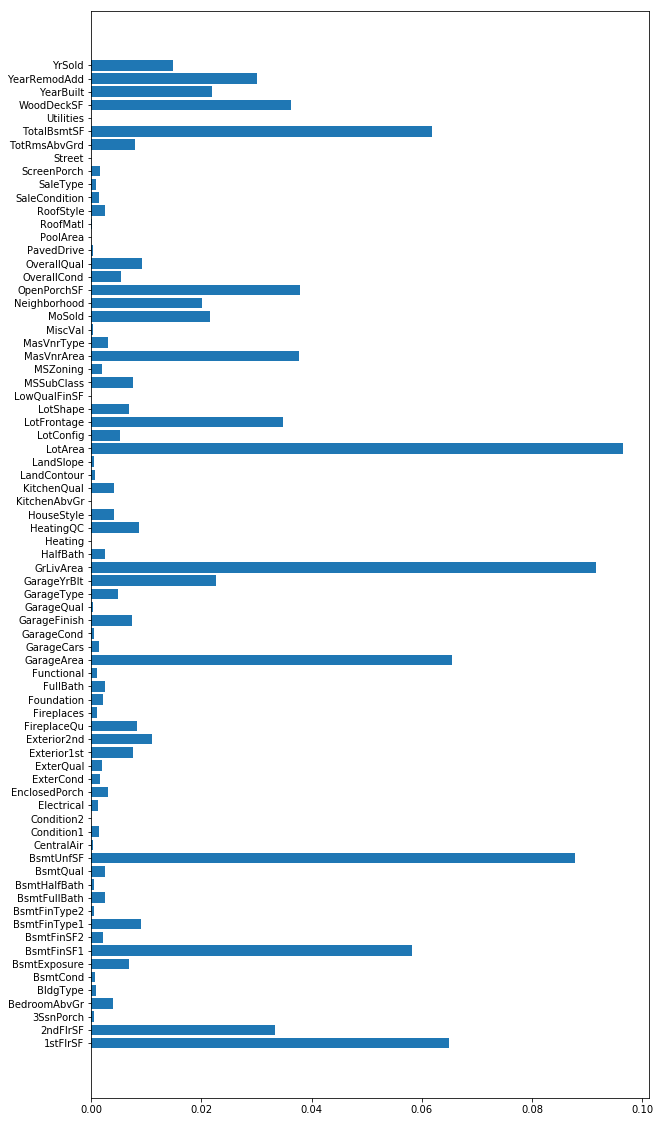

In [101]:
plt.rcParams["figure.figsize"] = (10,20)
plt.barh(df_out_X_col, model.feature_importances_)
plt.show()

In [102]:
df_XG=pd.DataFrame()

In [103]:
df_XG['Feature']=df_out_X_col
df_XG['Feature_Importance']=model.feature_importances_

In [104]:
df_XG.head()

,Feature,Feature_Importance
0,1stFlrSF,0.064919
1,2ndFlrSF,0.033301
2,3SsnPorch,0.000471
3,BedroomAbvGr,0.003927
4,BldgType,0.000931


In [105]:
df_XG=df_XG.sort_values(by=['Feature_Importance'],ascending=False)

In [106]:
df_XG

,Feature,Feature_Importance
45,LotArea,0.096424
36,GrLivArea,0.091588
14,BsmtUnfSF,0.087729
29,GarageArea,0.065379
0,1stFlrSF,0.064919
69,TotalBsmtSF,0.061878
7,BsmtFinSF1,0.058131
57,OpenPorchSF,0.037834
52,MasVnrArea,0.037721
71,WoodDeckSF,0.036207


In [107]:
feature_col_XG=df_XG['Feature'][:12].values

In [108]:
feature_col_XG

array(['LotArea', 'GrLivArea', 'BsmtUnfSF', 'GarageArea', '1stFlrSF',
       'TotalBsmtSF', 'BsmtFinSF1', 'OpenPorchSF', 'MasVnrArea',
       'WoodDeckSF', 'LotFrontage', '2ndFlrSF'], dtype=object)

### Using the new selected features in the 6 models again.

In [109]:
X=df_out[feature_col_XG]
y=np.log(df_out[['SalePrice']])

In [110]:
feature_col_XG

array(['LotArea', 'GrLivArea', 'BsmtUnfSF', 'GarageArea', '1stFlrSF',
       'TotalBsmtSF', 'BsmtFinSF1', 'OpenPorchSF', 'MasVnrArea',
       'WoodDeckSF', 'LotFrontage', '2ndFlrSF'], dtype=object)

### Split the data to train and test dataset

In [111]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=200)

### Ridge Regression

In [112]:
from sklearn.linear_model import Ridge
RR=Ridge(alpha=10,fit_intercept=False)
RR_fit=RR.fit(x_train,y_train)
y_pred=RR_fit.predict(x_train)
np.sqrt(mean_squared_error(y_pred,y_train))

2.629600867663847

In [113]:
y_pred=RR_fit.predict(x_test)
np.sqrt(mean_squared_error(y_pred,y_test))

3.811703670145779

### Lasso Regression

In [114]:
from sklearn.linear_model import Lasso
LR=Lasso(alpha=10,fit_intercept=False)
LR_fit=LR.fit(x_train,y_train)
y_pred=LR_fit.predict(x_train)
np.sqrt(mean_squared_error(y_pred,y_train))

2.652560274456522

In [115]:
y_pred=LR_fit.predict(x_test)
np.sqrt(mean_squared_error(y_pred,y_test))

3.757419116649446

### Elastic Net Model

In [116]:
from sklearn.linear_model import ElasticNetCV
EN = ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], 
                       l1_ratio=[.01, .1, .5, .9, .99], max_iter=5000)
EN_fit=EN.fit(x_train, y_train)

In [117]:
y_pred=EN_fit.predict(x_train)
np.sqrt(mean_squared_error(y_pred,y_train))

0.20097660980067533

In [118]:
y_pred=EN_fit.predict(x_test)
np.sqrt(mean_squared_error(y_pred,y_test))

0.37201606909663565

### Decision Tree Model

In [119]:
from sklearn.tree import DecisionTreeRegressor
DT=DecisionTreeRegressor()
DT_fit=DT.fit(x_train,y_train)

In [120]:
y_pred=DT_fit.predict(x_train)
np.sqrt(mean_squared_error(y_pred,y_train))

0.0020953788322777955

In [121]:
y_pred=DT_fit.predict(x_test)
np.sqrt(mean_squared_error(y_pred,y_test))

0.26602585484348545

### Random Forest Model

In [122]:
RF = ensemble.RandomForestRegressor(n_estimators=100, random_state=0)
RF_fit=RF.fit(x_train, y_train)

In [123]:
y_pred=RF_fit.predict(x_train)
np.sqrt(mean_squared_error(y_pred,y_train))

0.06764442155124281

In [124]:
y_pred=RF_fit.predict(x_test)
np.sqrt(mean_squared_error(y_pred,y_test))

0.17935936310778064

### XGBoost Model

In [125]:
XG = ensemble.GradientBoostingRegressor(loss='huber', learning_rate=0.05, n_estimators=3000, max_depth=10, 
                                  max_features='sqrt', min_samples_leaf=15, 
                                  min_samples_split=10)
XG_fit=XG.fit(x_train, y_train)

In [126]:
y_pred=XG_fit.predict(x_train)
np.sqrt(mean_squared_error(y_pred,y_train))

0.04932978674320244

In [127]:
y_pred=XG_fit.predict(x_test)
np.sqrt(mean_squared_error(y_pred,y_test))

0.17843435128384175